# **DASHBOARD DE FINANÇAS - TATUAGENS, CAMISETAS E SALÁRIO**

## **IMPORTS**

In [1]:
# conecta o colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cronometra o tempo de execução do programa
import time
start_script = time.time()

In [3]:
# Importa as bibliotecas necessárias
from datetime import datetime, date
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from IPython.display import clear_output 
import matplotlib.image as mpimg
from matplotlib import rcParams
from IPython.display import Image, display
import seaborn as sns

In [4]:
!pip install dataframe_image
clear_output()
import dataframe_image as dfi

##**FUNÇÕES**

In [5]:
# função pra adicionar texto nos graficos, com o valor pontual:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.2))

In [6]:
def plotagem_graficos(option):

  # figure size in inches optional
  c = 2.6  # multiplicador de tamanho da img
  rcParams['figure.figsize'] = 11*c , 8*c
  
  if option == 't':
    complemento = 'Tattoos'
  elif option == 'c':
    complemento = 'Camisetas'
  elif option == 's':
    complemento = 'Salario'
  elif option == 'g':
    complemento = 'Geral'

  # read images
  img_A = mpimg.imread('/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/' + complemento + '/Cumulativo_Graph.png')
  img_B = mpimg.imread('/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/' + complemento + '/Somatório_Graph.png')
  img_C = mpimg.imread('/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/' + complemento + '/Ganho_Preju_Graph.png')
  # img_D = mpimg.imread('/content/drive/MyDrive/Tattoos/Financeiro/Imagens/tabela.png')

  # display images
  fig, ax = plt.subplots(1,3)

  ax[0].imshow(img_A)
  ax[0].axis('off')

  ax[1].imshow(img_B)
  ax[1].axis('off')

  ax[2].imshow(img_C)
  ax[2].axis('off')


In [7]:
def plotagem_tabelas(option):

  if option == 't':
    complemento = 'Tattoos'
  elif option == 'c':
    complemento = 'Camisetas'
  elif option == 's':
    complemento = 'Salario'
  elif option == 'g':
    complemento = 'Geral'

  display(Image('/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/' + complemento + '/tabela.png', width=900, height=400))

##**TRATAMENTO DE DADOS**

In [8]:
# Dados crus para dataframe:
caminho_dados_financeiros = '/content/drive/MyDrive/Controle_Financeiro_Geral/Fluxo de Caixa CSV.csv'
df_fin = pd.read_csv(caminho_dados_financeiros, sep = ';', header = 0)
df_fin = df_fin.fillna('')

# removendo espaços vazios:
df_fin = df_fin.drop(df_fin[df_fin.Valor == "R$ 0,00"].index)

# Traduzindo coluna Valor (string) em Valor (decimal):
df_fin['Valor'] = df_fin['Valor'].str.replace('R$','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace('R$ ','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace('- ','-',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace('.','',regex=False)
df_fin['Valor'] = df_fin['Valor'].str.replace(',','.',regex=False)
df_fin['Valor'] = df_fin['Valor'].astype(float)

# Traduzindo Data (string) em Data (datetime):
df_fin['Data'] = pd.to_datetime(df_fin['Data'], format="%d/%m/%Y")

# Usando Data como Index:
df_fin = df_fin.set_index('Data')

# Definindo se foi Ganho ou Custo:
df_fin['Ganho_bool'] = 1 * (df_fin['Valor'] >= 0)
df_fin['Preju_bool'] = 1 * (df_fin['Valor'] <  0)
df_fin['Valor_Ganho'] = df_fin['Valor'] * df_fin['Ganho_bool'] 
df_fin['Valor_Preju'] = df_fin['Valor'] * df_fin['Preju_bool'] 
df_fin = df_fin.drop(columns = {'Ganho_bool', 'Preju_bool'})

# Display do dataframe:
df_fin.head()

,Descrição,Valor,TCS,Valor_Ganho,Valor_Preju
Data,,,,,
2021-11-20,Pedido - Máquina córun e kit tattoo - Medina shop,-1035.09,T,-0.0,-1035.09
2022-03-10,TATTOO SUPLIES - ARTEFATO - PARCELA 1/6,-225.09,T,-0.0,-225.09
2022-03-12,"DESINFET, SNOB E BORRIFADOR",-51.44,T,-0.0,-51.44
2022-03-14,"GILETTE, PLAST FILME, QUATERNARIO",-60.76,T,-0.0,-60.76
2022-03-15,tattoo orca xandin 1a sessao,100.00,T,100.0,0.00


In [9]:
# dataframe para tattoo
df_fin_t = df_fin.drop(df_fin[df_fin.TCS == "C"].index)
df_fin_t = df_fin_t.drop(df_fin_t[df_fin_t.TCS == "S"].index)
# dataframe para camiseta
df_fin_c = df_fin.drop(df_fin[df_fin.TCS == "T"].index)
df_fin_c = df_fin_c.drop(df_fin_c[df_fin_c.TCS == "S"].index)
# dataframe para salario
df_fin_s = df_fin.drop(df_fin[df_fin.TCS == "C"].index)
df_fin_s = df_fin_s.drop(df_fin_s[df_fin_s.TCS == "T"].index)


In [10]:
################################################################## TATTOO

# Separa a soma por mês em um novo dataframe:
df_resumo_t = df_fin_t.groupby(pd.Grouper(freq='M')).sum()
df_resumo_t.columns = ['Somatório','Ganho','Preju']

# Coluna de valores cumulativos:
df_resumo_t['Cumulativo'] = df_resumo_t['Somatório'].cumsum()

# Data (string):
df_resumo_t['ano'] = df_resumo_t.index.strftime('%Y').astype(str)
df_resumo_t['mes'] = df_resumo_t.index.strftime('%m').astype(str)
df_resumo_t['MesAno'] = df_resumo_t['mes'] + '/' + df_resumo_t['ano']
df_resumo_t = df_resumo_t.drop(['ano','mes'], axis=1)

################################################################## CAMISETA

# Separa a soma por mês em um novo dataframe:
df_resumo_c = df_fin_c.groupby(pd.Grouper(freq='M')).sum()
df_resumo_c.columns = ['Somatório','Ganho','Preju']

# Coluna de valores cumulativos:
df_resumo_c['Cumulativo'] = df_resumo_c['Somatório'].cumsum()

# Data (string):
df_resumo_c['ano'] = df_resumo_c.index.strftime('%Y').astype(str)
df_resumo_c['mes'] = df_resumo_c.index.strftime('%m').astype(str)
df_resumo_c['MesAno'] = df_resumo_c['mes'] + '/' + df_resumo_c['ano']
df_resumo_c = df_resumo_c.drop(['ano','mes'], axis=1)

################################################################## SALARIO

# Separa a soma por mês em um novo dataframe:
df_resumo_s = df_fin_s.groupby(pd.Grouper(freq='M')).sum()
df_resumo_s.columns = ['Somatório','Ganho','Preju']

# Coluna de valores cumulativos:
df_resumo_s['Cumulativo'] = df_resumo_s['Somatório'].cumsum()

# Data (string):
df_resumo_s['ano'] = df_resumo_s.index.strftime('%Y').astype(str)
df_resumo_s['mes'] = df_resumo_s.index.strftime('%m').astype(str)
df_resumo_s['MesAno'] = df_resumo_s['mes'] + '/' + df_resumo_s['ano']
df_resumo_s = df_resumo_s.drop(['ano','mes'], axis=1)

################################################################## GERAL

# Separa a soma por mês em um novo dataframe:
df_resumo = df_fin.groupby(pd.Grouper(freq='M')).sum()
df_resumo.columns = ['Somatório','Ganho','Preju']

# Coluna de valores cumulativos:
df_resumo['Cumulativo'] = df_resumo['Somatório'].cumsum()

# Data (string):
df_resumo['ano'] = df_resumo.index.strftime('%Y').astype(str)
df_resumo['mes'] = df_resumo.index.strftime('%m').astype(str)
df_resumo['MesAno'] = df_resumo['mes'] + '/' + df_resumo['ano']
df_resumo = df_resumo.drop(['ano','mes'], axis=1)



In [11]:
# Limitando os dataframes ao dia de hoje:
df_resumo_t = df_resumo_t.drop(df_resumo_t[df_resumo_t.index > pd.to_datetime(date.today())].index)
df_resumo_c = df_resumo_c.drop(df_resumo_c[df_resumo_c.index > pd.to_datetime(date.today())].index)
df_resumo_s = df_resumo_s.drop(df_resumo_s[df_resumo_s.index > pd.to_datetime(date.today())].index)
df_resumo = df_resumo.drop(df_resumo[df_resumo.index > pd.to_datetime(date.today())].index)

##**GERAÇÃO DE GRÁFICOS E TABELAS**

### **GERAÇÃO DE GRÁFICOS**

In [12]:
################################## CAMISETAS ##################################

x = np.arange(len(df_resumo_c['MesAno']))  # the label locations
width = 0.5  # the width of the bars

for n in df_resumo_c.columns:
  if ((n == 'MesAno')|(n == 'Preju')):
    pass
  elif n == 'Somatório':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo_c['MesAno'], df_resumo_c[n] , linewidth=2.0)
      colors = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_c['Somatório']]
      plt.bar(x - width/2, df_resumo_c[n], width,color=colors, label=n)
      plt.title('Acompanhamento Financeiro - Camisetas')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo_c['MesAno']))  # passo de tempo
      addlabels(df_resumo_c['MesAno'], df_resumo_c[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Camisetas' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()

  elif n == 'Cumulativo':
    with plt.style.context('Solarize_Light2'):
      plt.plot(df_resumo_c['MesAno'], df_resumo_c[n] , 'm', linewidth=2.0)
      # plt.bar(x - width/2, df_resumo_c[n], width, label=n)
      plt.title('Acompanhamento Financeiro - Camisetas')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo_c['MesAno']))  # passo de tempo
      addlabels(df_resumo_c['MesAno'], df_resumo_c[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Camisetas' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()
  
  elif n == 'Ganho':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo_c['MesAno'], df_resumo_c[n] , linewidth=2.0)
      colorsg = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_c['Ganho']]
      colorsp = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_c['Preju']]
      plt.bar(x - width/2, df_resumo_c['Ganho'], width,color=colorsg, label=n)
      plt.bar(x - width/2, df_resumo_c['Preju'], width,color=colorsp, label=n)
      plt.title('Acompanhamento Financeiro - Camisetas')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( 'Ganhos e Perdas' , fontsize=14)
      plt.xticks(x, list(df_resumo_c['MesAno']))  # passo de tempo
      addlabels(df_resumo_c['MesAno'], df_resumo_c['Ganho'])
      addlabels(df_resumo_c['MesAno'], df_resumo_c['Preju'])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Camisetas' , n  + '_Preju_Graph'), dpi=300, bbox_inches='tight')
    plt.show()


################################## TATUAGENS ##################################

x = np.arange(len(df_resumo_t['MesAno']))  # the label locations
width = 0.5  # the width of the bars

for n in df_resumo_t.columns:
  if ((n == 'MesAno')|(n == 'Preju')):
    pass
  elif n == 'Somatório':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo_t['MesAno'], df_resumo_t[n] , linewidth=2.0)
      colors = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_t['Somatório']]
      plt.bar(x - width/2, df_resumo_t[n], width,color=colors, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo_t['MesAno']))  # passo de tempo
      addlabels(df_resumo_t['MesAno'], df_resumo_t[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Tattoos' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()

  elif n == 'Cumulativo':
    with plt.style.context('Solarize_Light2'):
      plt.plot(df_resumo_t['MesAno'], df_resumo_t[n] , 'm', linewidth=2.0)
      # plt.bar(x - width/2, df_resumo_t[n], width, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo_t['MesAno']))  # passo de tempo
      addlabels(df_resumo_t['MesAno'], df_resumo_t[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Tattoos' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()
  
  elif n == 'Ganho':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo_t['MesAno'], df_resumo_t[n] , linewidth=2.0)
      colorsg = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_t['Ganho']]
      colorsp = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_t['Preju']]
      plt.bar(x - width/2, df_resumo_t['Ganho'], width,color=colorsg, label=n)
      plt.bar(x - width/2, df_resumo_t['Preju'], width,color=colorsp, label=n)
      plt.title('Acompanhamento Financeiro - Tatuagens')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( 'Ganhos e Perdas' , fontsize=14)
      plt.xticks(x, list(df_resumo_t['MesAno']))  # passo de tempo
      addlabels(df_resumo_t['MesAno'], df_resumo_t['Ganho'])
      addlabels(df_resumo_t['MesAno'], df_resumo_t['Preju'])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Tattoos' , n  + '_Preju_Graph'), dpi=300, bbox_inches='tight')
    plt.show()



################################## SALÁRIO ##################################

x = np.arange(len(df_resumo_s['MesAno']))  # the label locations
width = 0.5  # the width of the bars

for n in df_resumo_s.columns:
  if ((n == 'MesAno')|(n == 'Preju')):
    pass
  elif n == 'Somatório':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo_s['MesAno'], df_resumo_s[n] , linewidth=2.0)
      colors = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_s['Somatório']]
      plt.bar(x - width/2, df_resumo_s[n], width,color=colors, label=n)
      plt.title('Acompanhamento Financeiro - Salário')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo_s['MesAno']))  # passo de tempo
      addlabels(df_resumo_s['MesAno'], df_resumo_s[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Salario' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()

  elif n == 'Cumulativo':
    with plt.style.context('Solarize_Light2'):
      plt.plot(df_resumo_s['MesAno'], df_resumo_s[n] , 'm', linewidth=2.0)
      # plt.bar(x - width/2, df_resumo_s[n], width, label=n)
      plt.title('Acompanhamento Financeiro - Salário')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo_s['MesAno']))  # passo de tempo
      addlabels(df_resumo_s['MesAno'], df_resumo_s[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Salario' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()
  
  elif n == 'Ganho':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo_s['MesAno'], df_resumo_s[n] , linewidth=2.0)
      colorsg = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_s['Ganho']]
      colorsp = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo_s['Preju']]
      plt.bar(x - width/2, df_resumo_s['Ganho'], width,color=colorsg, label=n)
      plt.bar(x - width/2, df_resumo_s['Preju'], width,color=colorsp, label=n)
      plt.title('Acompanhamento Financeiro - Salário')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( 'Ganhos e Perdas' , fontsize=14)
      plt.xticks(x, list(df_resumo_s['MesAno']))  # passo de tempo
      addlabels(df_resumo_s['MesAno'], df_resumo_s['Ganho'])
      addlabels(df_resumo_s['MesAno'], df_resumo_s['Preju'])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Salario' , n  + '_Preju_Graph'), dpi=300, bbox_inches='tight')
    plt.show()


################################## GERAL ##################################

x = np.arange(len(df_resumo['MesAno']))  # the label locations
width = 0.5  # the width of the bars

for n in df_resumo.columns:
  if ((n == 'MesAno')|(n == 'Preju')):
    pass
  elif n == 'Somatório':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo['MesAno'], df_resumo[n] , linewidth=2.0)
      colors = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Somatório']]
      plt.bar(x - width/2, df_resumo[n], width,color=colors, label=n)
      plt.title('Acompanhamento Financeiro - Geral')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Geral' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()

  elif n == 'Cumulativo':
    with plt.style.context('Solarize_Light2'):
      plt.plot(df_resumo['MesAno'], df_resumo[n] , 'm', linewidth=2.0)
      # plt.bar(x - width/2, df_resumo[n], width, label=n)
      plt.title('Acompanhamento Financeiro - Geral')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( n , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo[n])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Geral' , n  + '_Graph'), dpi=300, bbox_inches='tight')
    plt.show()
  
  elif n == 'Ganho':
    with plt.style.context('Solarize_Light2'):
      # plt.plot(df_resumo['MesAno'], df_resumo[n] , linewidth=2.0)
      colorsg = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Ganho']]
      colorsp = ["tomato" if i < 0 else "yellowgreen" for i in df_resumo['Preju']]
      plt.bar(x - width/2, df_resumo['Ganho'], width,color=colorsg, label=n)
      plt.bar(x - width/2, df_resumo['Preju'], width,color=colorsp, label=n)
      plt.title('Acompanhamento Financeiro - Geral')
      plt.xlabel('Mês', fontsize=14)
      plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      plt.ylabel( 'Ganhos e Perdas' , fontsize=14)
      plt.xticks(x, list(df_resumo['MesAno']))  # passo de tempo
      addlabels(df_resumo['MesAno'], df_resumo['Ganho'])
      addlabels(df_resumo['MesAno'], df_resumo['Preju'])
    plt.savefig(os.path.join( '/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Geral' , n  + '_Preju_Graph'), dpi=300, bbox_inches='tight')
    plt.show()


clear_output()

### **GERAÇÃO DE TABELAS**

In [13]:
df_resumo_fancy = df_resumo.copy()
df_resumo_fancy_t = df_resumo_t.copy()
df_resumo_fancy_c = df_resumo_c.copy()
df_resumo_fancy_s = df_resumo_s.copy()

In [14]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '16px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'black'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '16px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

cm = sns.light_palette("green", as_cmap=True)

In [15]:
dfi.export(df_resumo_fancy, "/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Geral/tabela.png",table_conversion="matplotlib")
dfi.export(df_resumo_fancy_t, "/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Tattoos/tabela.png",table_conversion="matplotlib")
dfi.export(df_resumo_fancy_c, "/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Camisetas/tabela.png",table_conversion="matplotlib")
dfi.export(df_resumo_fancy_s, "/content/drive/MyDrive/Controle_Financeiro_Geral/Imagens/Salario/tabela.png",table_conversion="matplotlib")
clear_output()

## **Plot de gráficos e tabelas:**

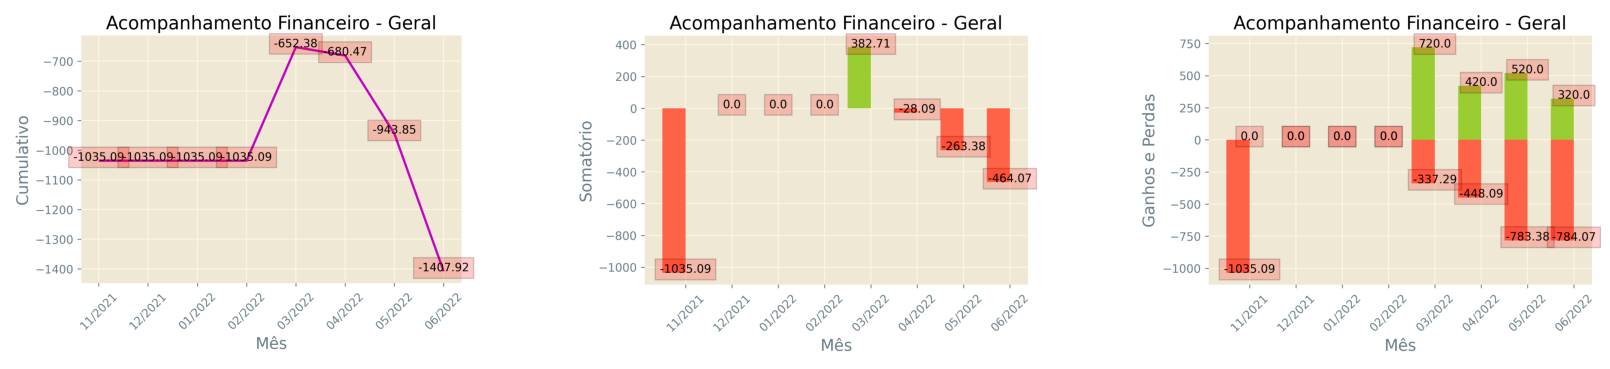

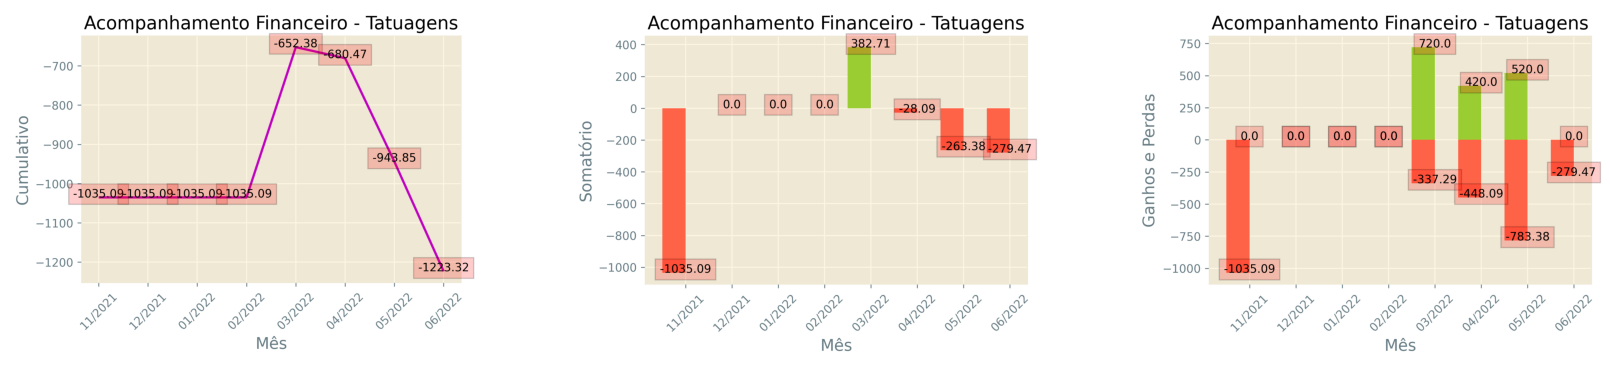

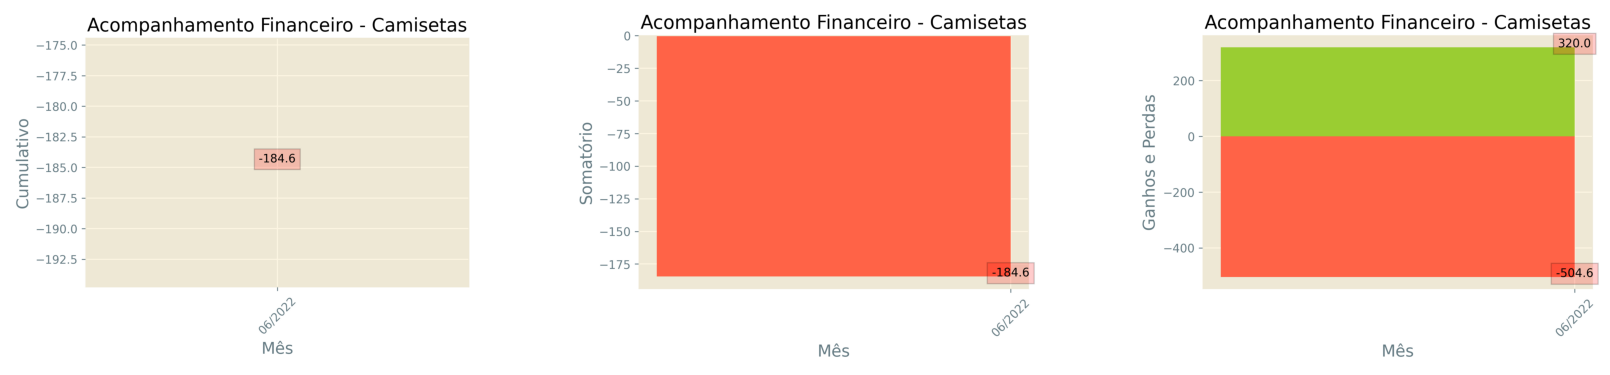

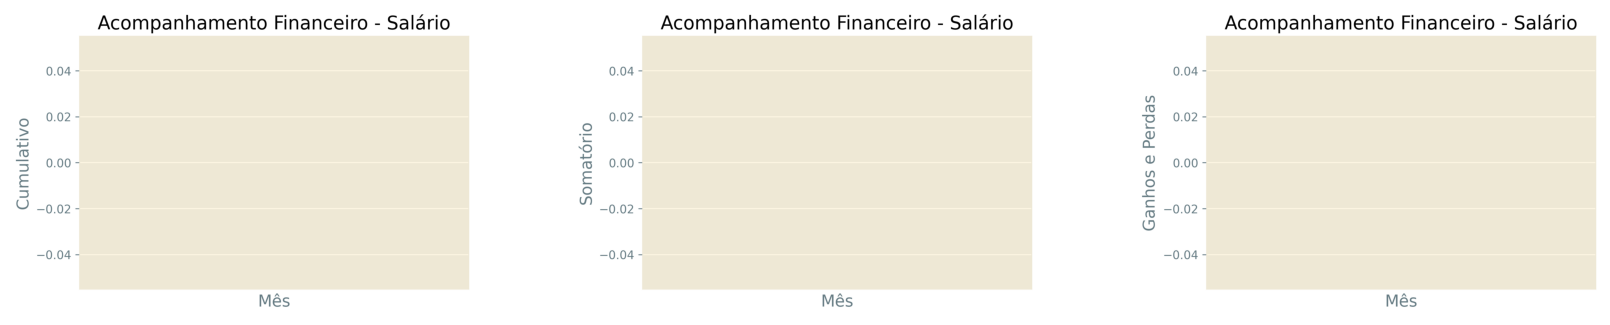

In [16]:
%matplotlib inline
plotagem_graficos('g')
plotagem_graficos('t')
plotagem_graficos('c')
plotagem_graficos('s')

In [17]:
################################ GERAL
(df_resumo_fancy.style
  .background_gradient(cmap=cm, subset=['Somatório','Cumulativo'])
  .hide_index()
  .set_caption('Informações Relevantes - Ganho e Custos Gerais')
  .format(precision=2)
  .set_table_styles(styles))




Somatório,Ganho,Preju,Cumulativo,MesAno
-1035.09,0.00,-1035.09,-1035.09,11/2021
0.00,0.00,0.00,-1035.09,12/2021
0.00,0.00,0.00,-1035.09,01/2022
0.00,0.00,0.00,-1035.09,02/2022
382.71,720.00,-337.29,-652.38,03/2022
-28.09,420.00,-448.09,-680.47,04/2022
-263.38,520.00,-783.38,-943.85,05/2022
-464.07,320.00,-784.07,-1407.92,06/2022


In [18]:
################################ TATTOO
(df_resumo_fancy_t.style
  .background_gradient(cmap=cm, subset=['Somatório','Cumulativo'])
  .hide_index()
  .set_caption('Informações Relevantes - Ganho e Custos das Tattoos')
  .format(precision=2)
  .set_table_styles(styles))

Somatório,Ganho,Preju,Cumulativo,MesAno
-1035.09,0.00,-1035.09,-1035.09,11/2021
0.00,0.00,0.00,-1035.09,12/2021
0.00,0.00,0.00,-1035.09,01/2022
0.00,0.00,0.00,-1035.09,02/2022
382.71,720.00,-337.29,-652.38,03/2022
-28.09,420.00,-448.09,-680.47,04/2022
-263.38,520.00,-783.38,-943.85,05/2022
-279.47,0.00,-279.47,-1223.32,06/2022


In [19]:
################################ CAMISETAS
(df_resumo_fancy_c.style
  .background_gradient(cmap=cm, subset=['Somatório','Cumulativo'])
  .hide_index()
  .set_caption('Informações Relevantes - Ganho e Custos das Camisetas')
  .format(precision=2)
  .set_table_styles(styles))

Somatório,Ganho,Preju,Cumulativo,MesAno
-184.60,320.00,-504.60,-184.60,06/2022


In [20]:
################################ SALARIO
(df_resumo_fancy_s.style
  .background_gradient(cmap=cm, subset=['Somatório','Cumulativo'])
  .hide_index()
  .set_caption('Informações Relevantes - Ganho e Custos do Salário')
  .format(precision=2)
  .set_table_styles(styles))

Somatório,Ganho,Preju,Cumulativo,MesAno


##**Criação de Dashboard Standalone**

In [21]:
!pip install jupyter-dash==0.3.0
!pip install dash==2.0.0
!pip install dash-cytoscape
clear_output()

In [36]:
df_resumo['ind'] = 'Geral'
df_resumo_t['ind'] = 'Tattoo'
df_resumo_c['ind'] = 'Camiseta'
df_resumo_s['ind'] = 'Salário'

df_resumo_tot = pd.concat([df_resumo, df_resumo_t, df_resumo_c, df_resumo_s])

In [42]:
df_resumo_tot

,Somatório,Ganho,Preju,Cumulativo,MesAno,ind
Data,,,,,,
2021-11-30,-1035.09,0.0,-1035.09,-1035.09,11/2021,Geral
2021-12-31,0.00,0.0,0.00,-1035.09,12/2021,Geral
2022-01-31,0.00,0.0,0.00,-1035.09,01/2022,Geral
2022-02-28,0.00,0.0,0.00,-1035.09,02/2022,Geral
2022-03-31,382.71,720.0,-337.29,-652.38,03/2022,Geral
2022-04-30,-28.09,420.0,-448.09,-680.47,04/2022,Geral
2022-05-31,-263.38,520.0,-783.38,-943.85,05/2022,Geral
2022-06-30,-464.07,320.0,-784.07,-1407.92,06/2022,Geral
2021-11-30,-1035.09,0.0,-1035.09,-1035.09,11/2021,Tattoo


In [63]:
from jupyter_dash import JupyterDash  # pip install dash
import dash_cytoscape as cyto  # pip install dash-cytoscape==0.2.0 or higher
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import pandas as pd  # pip install pandas
import plotly.express as px
import math
from dash import no_update


import plotly.offline as pyo
import plotly.graph_objs as go



external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)


df = df_resumo_tot.copy()

# criando uma variável para armazenar os estados, para o usuario poder utilizar o dropdown e trocar de estado
analysis_options = []
for analysis in df['ind'].unique():
    analysis_options.append({'label': analysis, 'value': analysis})


# Criando o layout
app.layout = html.Div([
    # cabeçalho
    html.Div([
        # Titulo
        html.H1("Dados do Acompanhamento Financeiro Pessoal",
                style = {'textAlign': 'center', # alinhando o titulo ao centro
                         'fontFamily': 'Roboto', # alterando a fonte do H1
                         'paddingTop': 20}), # adicionando um padding no topo
        # Aviso
        html.P("Selecione uma Análise:",
              style = {'fontFamily': 'Roboto'}),
        # Dropdown
        html.Div([
            dcc.Dropdown(id = 'analysis-picker', # id do dropdown
                     value = 'Geral', # seta o valor inicial,
                     options = analysis_options, # as opções que vão aparecer no dropdown
                     clearable = False, # permite remover o valor (acho importante manter false para evitar problemas)
                     )
        ], style = {'width': '33%',
                            'display': 'inline-block'})
    ]),


    # Grafico de barras
    html.Div([
        # Titulo do gráfico de dispersão
        html.H3(id = 'titulo-barplot',
               style = {'textAlign': 'center',
                        'fontFamily': 'Roboto',
                        'paddingTop': 10
                       }
               ),
        # Gráfico de barras
        dcc.Graph(id = 'bar-plot')
    ], style = {'paddingLeft': '10%',
                     'padingRight': '10%',
                     'width': '80%',
                     'display': 'inline-block'}
    ),
 
    # Referencia
    html.Div([
        html.Label(["Fonte: ",
                html.A('andersonmdcanteli.github.io',
                       href='https://andersonmdcanteli.github.io/Dashboards-Parte-3/#dashboards-finais'),
                        ". Acesso em 25/07/2022"
                   ]),
        html.Label([
            html.P(["Desenvolvido por Luca Martins (lucammarini@gmail.com)"])
        ])
            ], style={'textAlign': 'center',
                       'fontFamily' : "Roboto",
                       'paddingTop': 15
                      }
    )


])



# Grafico de barras
@app.callback(Output('bar-plot', 'figure'),
              [Input('analysis-picker', 'value')])
def update_bar_plot(selected_analysis):

    df_aux = df[df['ind'] == selected_analysis] # data frame filtrado baseado no selected_analysis
    # df_aux.reset_index(drop=True, inplace=True) # resetando o indice para facilitar a vida

    traco = [go.Bar(
            x = df_aux['MesAno'], # os dados do eixo x
            y = df_aux['Somatório'], # dados do eio y
            name = selected_analysis, # nome do bioma
            # hovertemplate = ['Total de focos de queimadas: ' + i for i in [str(i) for i in (df_aux['Total'])]],
                )
            ]
    return {
            'data': traco,
            'layout': go.Layout(
                              xaxis = dict(title = 'Anos', linecolor='rgba(0,0,0,1)', tickmode = 'array', tickvals = df_aux['MesAno'], ticktext = df_aux['MesAno']), # adicionando nome eo eixo x, barra (y=0) na cor preta, e fixando o ano abaixo de todas as barras
                              yaxis = dict(title = 'Total de queimadas por ano', linecolor='rgba(0,0,0,1)', tickformat=False), # adicionando nome no eixo y, passando uma linha preta em x = 0, e removendo a formatação padrão dos ticks, para que não apareça o K
                              showlegend=True, # adicionando a legenda
                              hoverlabel=dict(bgcolor="white", # alterando a cor de fundo do hover
                                                font_size=16, # alterando o tamanho da letra no hover
                                                font_family="Roboto") # alterando a fonte do hover
                                )
                }


# Titulo do gráfico de barras
@app.callback(Output('titulo-barplot', 'children'),
             [Input('analysis-picker', 'value')])
def update_titulo_barplot(selected_analysis):
    return "Número Taaaaaaaaaaaaaaaaaaaaaaa o período no bioma: " + str(selected_analysis)





app.css.config.serve_locally=True
app.scripts.config.serve_locally=True

if __name__ =='__main__':
    app.run_server(debug=True, port=8051)

Dash app running on:


<IPython.core.display.Javascript object>

In [48]:
x = df_aux['MesAno'], # os dados do eixo x
y = df_aux['Somatório'], # dados do eio y

In [53]:
y[0]

Data
2021-11-30   -1035.09
2021-12-31       0.00
2022-01-31       0.00
2022-02-28       0.00
2022-03-31     382.71
2022-04-30     -28.09
2022-05-31    -263.38
2022-06-30    -279.47
Name: Somatório, dtype: float64

##**FINALIZAÇÃO DO SCRIPT**

In [23]:
end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 60.60 segundos
